## Homework 5
Daniela Fuentes  - 6000607

# Análisis de rendimiento del modelo posterior a su entrenamiento

### *Estos se realizo luego de entrenar el modelo.*





## **Modelo de Capas Completamente Conectadas (FC)**
*   **Pérdida y MAE de Entrenamiento**: Disminuyen consistentemente a lo largo de las 10 épocas, alcanzando una pérdida de 0.1332 y un MAE de 0.2564.
* **Pérdida y MAE de Validación**: La pérdida y MAE de validación también disminuyen, alcanzando una pérdida final de 0.1434 y MAE de 0.2867.

En conclucion, este modelo muestra un rendimiento adecuado, con diferencias mínimas entre las métricas de entrenamiento y validación, lo cual sugiere un buen ajuste y una adecuada capacidad generalizadora.


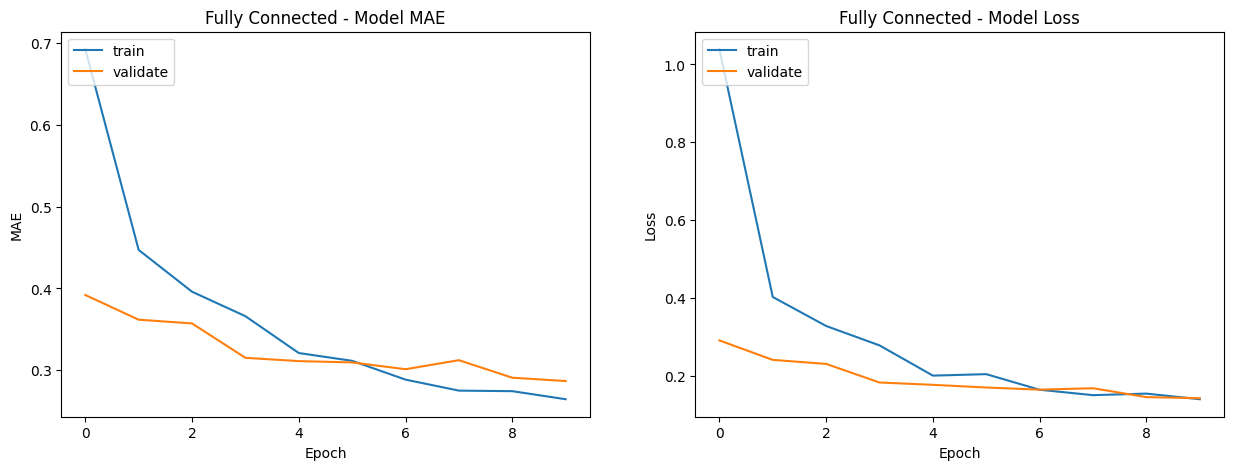

## **Modelo de Convolución 1D (Conv1D)**
* **Pérdida y MAE de Entrenamiento**: Disminuyen, con una pérdida de 10.1065 y un MAE de 2.4780 al finalizar.
* **Pérdida y MAE de Validación**: La pérdida de validación muestra algo de variabilidad, con un valor final de 11.0802 y un MAE de 2.5167.

En pocas palabras,Este modelo presenta una pérdida de validación superior y fluctuaciones a través de las épocas, lo cual podría indicar sobreajuste o la necesidad de optimización en la arquitectura o parámetros.


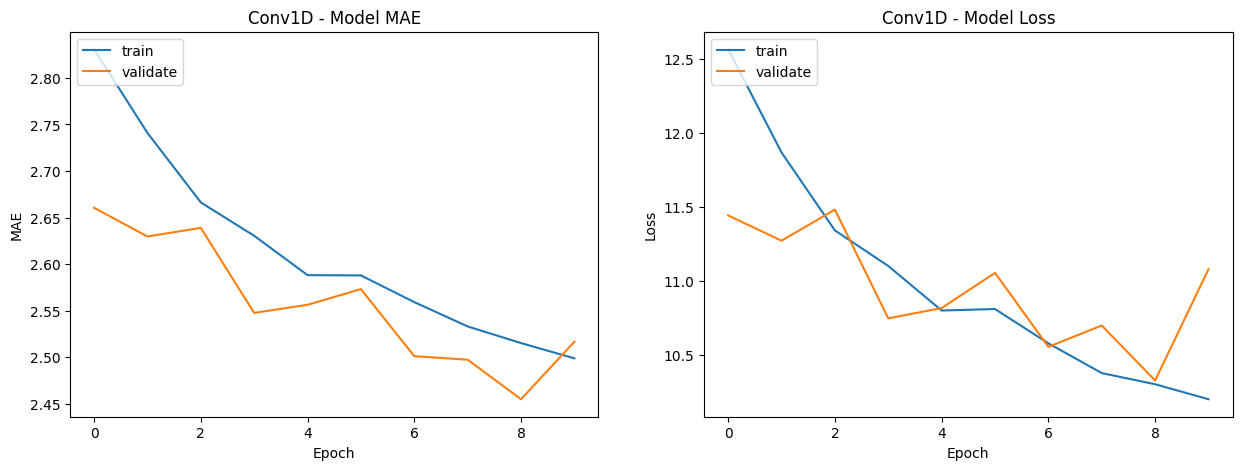

## Conclusión
El modelo FC es claramente el mejor en este caso, ya que tiene una pérdida y un MAE significativamente menores tanto en las evaluaciones de entrenamiento y validación como en el conjunto de prueba. El modelo Conv1D parece no haber logrado capturar las características de los datos con la misma efectividad.

### Instalar KaggleHub para descargar datos de Kaggle




In [1]:

!pip install kagglehub

# Descargar el conjunto de datos de Jena Climate de Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mnassrib/jena-climate")
print("Path to dataset files:", path)

100%|██████████| 13.2M/13.2M [00:00<00:00, 51.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mnassrib/jena-climate/versions/1


### Importar librerias

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
import matplotlib.pyplot as plt

## Carga y preprocesamiento de datos

In [12]:
# Cargar datos
data_path = f"{path}/jena_climate_2009_2016.csv"  # Asegúrate de que el nombre del archivo sea correcto
data = pd.read_csv(data_path)
temperature = data['T (degC)'].values.astype(np.float32)

# Dividir los datos en entrenamiento (60%), prueba (30%) y validación (10%)
train_frac = 0.6
val_frac = 0.3
test_frac = 0.1

train_idx = int(len(temperature) * train_frac)
val_idx = int(len(temperature) * (train_frac + val_frac))

train_data = temperature[:train_idx]
val_data = temperature[train_idx:val_idx]
test_data = temperature[val_idx:]


# Preparación de los datos de entrenamiento, validación y prueba
train_dataset = timeseries_dataset_from_array(
    data=train_data[:-sequence_length],
    targets=train_data[sequence_length:],
    sequence_length=sequence_length,
    batch_size=batch_size
).map(lambda x, y: (tf.expand_dims(x, axis=-1), y))  # Expande las dimensiones aquí

val_dataset = timeseries_dataset_from_array(
    data=val_data[:-sequence_length],
    targets=val_data[sequence_length:],
    sequence_length=sequence_length,
    batch_size=batch_size
).map(lambda x, y: (tf.expand_dims(x, axis=-1), y))  # Expande las dimensiones aquí

test_dataset = timeseries_dataset_from_array(
    data=test_data[:-sequence_length],
    targets=test_data[sequence_length:],
    sequence_length=sequence_length,
    batch_size=batch_size
).map(lambda x, y: (tf.expand_dims(x, axis=-1), y))  # Expande las dimensiones aquí

# Verificar la forma de un lote después de la expansión
for batch in train_dataset.take(1):
    print("Forma del lote de entrada (después de expandir):", batch[0].shape)  # (batch_size, sequence_length, 1)
    print("Forma del lote de etiquetas:", batch[1].shape)  # (batch_size,)



Forma del lote de entrada (después de expandir): (32, 120, 1)
Forma del lote de etiquetas: (32,)


# Modelo de regresión con capas FC

* El optimizador utilizado es adam.
* La función de pérdida es mean_squared_error.
* La métrica de evaluación es mean_absolute_error.

In [16]:
# Modelo de regresión con capas FC ajustado
model_fc = Sequential([
    layers.Input(shape=(120, 1)),  # Asegura la entrada correcta
    layers.Reshape((120, 1)),      # Cambia la forma si es necesario
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)  # Salida para regresión
])

model_fc.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Entrenamiento del modelo FC
history_fc = model_fc.fit(train_dataset, validation_data=val_dataset, epochs=10)


Epoch 1/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 76s 9ms/step - loss: 1.6153 - mae: 0.8621 - val_loss: 0.2917 - val_mae: 0.3920
Epoch 2/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 76s 9ms/step - loss: 0.4430 - mae: 0.4632 - val_loss: 0.2417 - val_mae: 0.3618
Epoch 3/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 67s 9ms/step - loss: 0.4298 - mae: 0.4289 - val_loss: 0.2314 - val_mae: 0.3572
Epoch 4/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - loss: 0.4060 - mae: 0.3983 - val_loss: 0.1836 - val_mae: 0.3151
Epoch 5/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 84s 9ms/step - loss: 0.2113 - mae: 0.3238 - val_loss: 0.1777 - val_mae: 0.3111
Epoch 6/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step - loss: 0.3033 - mae: 0.3430 - val_loss: 0.1708 - val_mae: 0.3095
Epoch 7/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 66s 8ms/step - loss: 0.1838 - mae: 0.2970 - val_loss: 0.1653 - val_mae: 0.3012
Epoch 8/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - loss: 0.1524 - mae: 0.2747 - val_loss: 0.1689 - val_mae: 0.3122
Epoch 9/10
7878/7878 ━━━━━━━━━━━

# Entrenamiento del modelo Conv1D

In [17]:
# Modelo de regresión con capas Conv1D
model_conv1d = Sequential([
    layers.Input(shape=(sequence_length, 1)),
    layers.Conv1D(filters=32, kernel_size=3, activation="relu"),
    layers.Conv1D(filters=16, kernel_size=3, activation="relu"),
    layers.GlobalMaxPooling1D(),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

model_conv1d.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Entrenamiento del modelo Conv1D
history_conv1d = model_conv1d.fit(train_dataset, validation_data=val_dataset, epochs=10)


Epoch 1/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 109s 14ms/step - loss: 13.1623 - mae: 2.8788 - val_loss: 11.4433 - val_mae: 2.6605
Epoch 2/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 144s 14ms/step - loss: 11.8980 - mae: 2.7379 - val_loss: 11.2722 - val_mae: 2.6297
Epoch 3/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 108s 14ms/step - loss: 11.3283 - mae: 2.6578 - val_loss: 11.4824 - val_mae: 2.6389
Epoch 4/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 140s 13ms/step - loss: 11.0736 - mae: 2.6240 - val_loss: 10.7475 - val_mae: 2.5477
Epoch 5/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 162s 16ms/step - loss: 10.6936 - mae: 2.5687 - val_loss: 10.8170 - val_mae: 2.5563
Epoch 6/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 107s 14ms/step - loss: 10.6550 - mae: 2.5619 - val_loss: 11.0548 - val_mae: 2.5732
Epoch 7/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 141s 14ms/step - loss: 10.4508 - mae: 2.5349 - val_loss: 10.5549 - val_mae: 2.5011
Epoch 8/10
7878/7878 ━━━━━━━━━━━━━━━━━━━━ 105s 13ms/step - loss: 10.2308 - mae: 2.5099 - val_loss: 10.6993 - val_mae: 2.4974


## Graficar el rendimiento

In [18]:
def plot_model_history(history, title):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(history.history['mae'])
    axs[0].plot(history.history['val_mae'])
    axs[0].set_title(f'{title} - Model MAE')
    axs[0].set_ylabel('MAE')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title(f'{title} - Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# Graficar rendimiento de ambos modelos

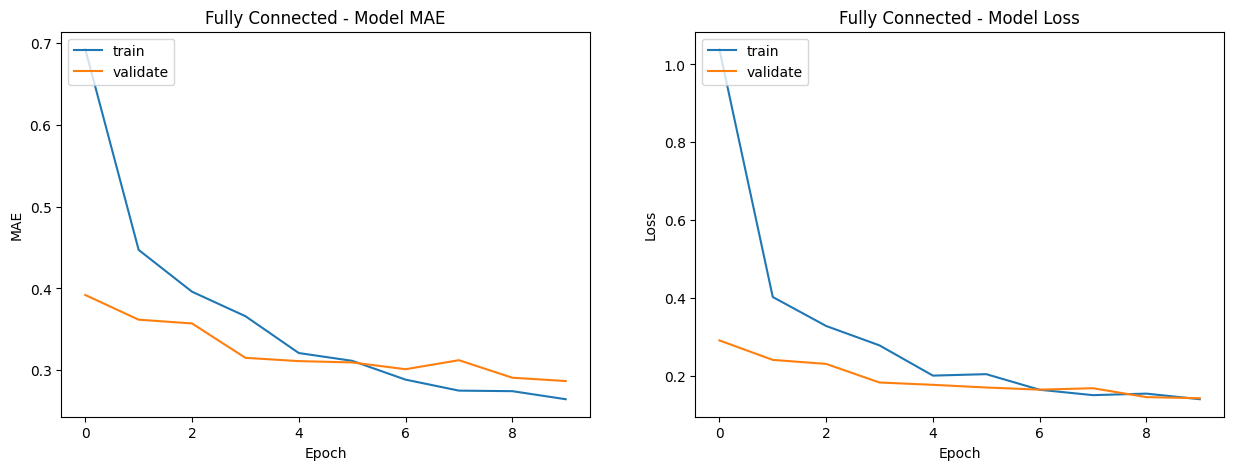

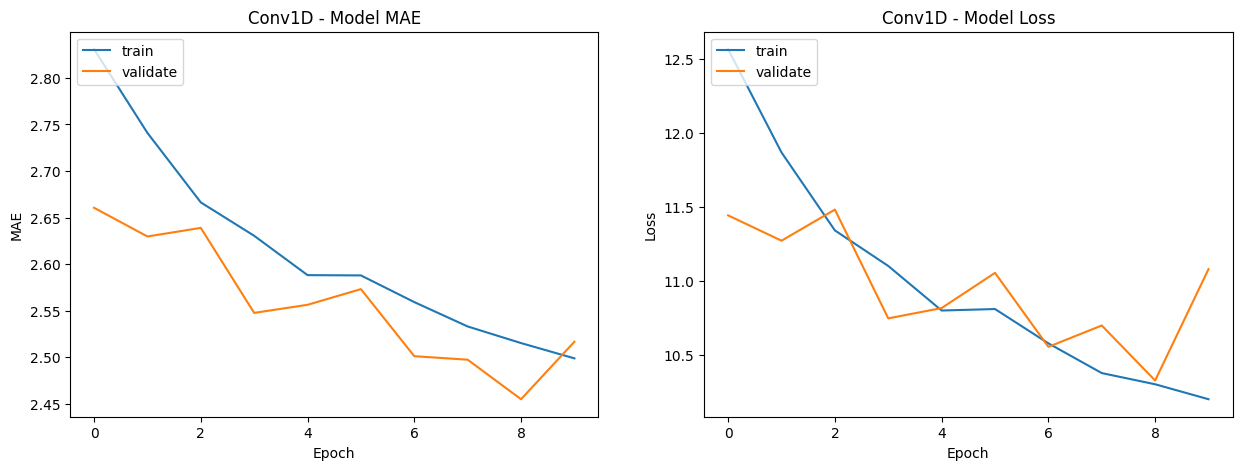

In [19]:
plot_model_history(history_fc, "Fully Connected")
plot_model_history(history_conv1d, "Conv1D")

### Evaluación en el conjunto de prueba

In [20]:
fc_loss, fc_mae = model_fc.evaluate(test_dataset)
conv1d_loss, conv1d_mae = model_conv1d.evaluate(test_dataset)

print(f"Modelo FC - Pérdida: {fc_loss:.4f}, MAE: {fc_mae:.4f}")
print(f"Modelo Conv1D - Pérdida: {conv1d_loss:.4f}, MAE: {conv1d_mae:.4f}")

1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1464 - mae: 0.2936
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 12.5819 - mae: 2.7617
Modelo FC - Pérdida: 0.1417, MAE: 0.2880
Modelo Conv1D - Pérdida: 13.2128, MAE: 2.7780
